# The Site Performance Report of PEPFAR's programs in Vietnam from 2015 - 2020 

In [ ]:
### Introduction
### For this analyzing project, I wanted to explore the Site Performance with Operating Unit locating in Vietnam using Site data for MER (Monitoring, Evaluation and Reporting). I wanted to know about how clinical facilities in Vietnam operate in preventing and treating HIV/AIDS with funding and technical support from USAID.
### The results through given period are measured by using Prevention, Testing, Treatment and Virual Suppression indicators.
### The below analyzing and visualing reports was implemented by using programming lanuage Python (https://www.python.org) with supported open source libraries.
### The reason why I chose programming language Python and open source libraries for this project to transform, clean, analyze and visualize data is that I want to demonstrate I can accomplish any MER tasks by using coding, help to strengthen SI system regarless of the current complexity and diversed health information systems in local clinicals and hospitals. I believe understanding and exploring database level by using common tools with supported of programming langaguage is the fundemental way to understand current operation of any clinicals and hospitals regarless of what kinds of tools or platforms they use. And through that findings, USAID can provide better technical assistance for mentoring, control and improve data to strengthen HIS and for PEPFAR's MER.

In [ ]:
#### This report using the dataset Quarterly Results and yearly Targets by Operating Unit, PSNU and Facility/Site for Fiscal Years 2015 – 2020 and commonly used indicators across PEPFAR’s Program Areas downloaded from PEPFAR Panorama Spotlight (https://data.pepfar.gov)
#### Link to the dataset [Site Performance](https://data.pepfar.gov/dashboards)

## Import and overview of the dataset

First of all, I imported the necessary library and tools to support data analytic. These library and tools were built by using programming language Python. 

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import folium

Show all columns in returned results

In [32]:
pd.set_option('display.max_columns', None)

Read the Dataset in the format of CSV file downloaded from PEPFAR Panorama Spotlight (https://data.pepfar.gov)

In [33]:
df = pd.read_csv('SitePerformance FY2015 to FY2020Q4.csv')

Query the first 10 records

In [34]:
df.head(10)

Report Name Operating Unit      PSNU         Facility    Indicator  \
0  7. Site Performance         Angola  Benguela  Facility 36c09f      TB_PREV   
1  7. Site Performance         Angola  Benguela  Facility 36c09f  HTS_TST_POS   
2  7. Site Performance         Angola  Benguela  Facility 36c09f      HTS_TST   
3  7. Site Performance         Angola  Benguela  Facility 36c09f  TB_STAT_POS   
4  7. Site Performance         Angola  Benguela  Facility 36c09f      TB_STAT   
5  7. Site Performance         Angola  Benguela  Facility 36c09f        TX_TB   
6  7. Site Performance         Angola  Benguela  Facility 36c09f   TX_NET_NEW   
7  7. Site Performance         Angola  Benguela  Facility 36c09f      TX_CURR   
8  7. Site Performance         Angola  Benguela  Facility 36c09f       TX_NEW   
9  7. Site Performance         Angola  Benguela  Facility 36c09f       TB_ART   

                                         Description  2015 Q1+Q2-R  2015 Q3-R  \
0  ART patients who completed a standard course o...           NaN        NaN   
1          Individuals newly tested positive for HIV           NaN        NaN   
2  Individuals tested for HIV and received their ...           NaN        NaN   
3     TB cases with a documented HIV positive status           NaN        NaN   
4                TB cases with documented HIV status           NaN        NaN   
5      ART patients who were started on TB treatment           NaN        NaN   
6  Net increase or decrease in patients receiving...           NaN        NaN   
7  People currently receiving antiretroviral therapy           NaN        NaN   
8    People newly enrolled on antiretroviral therapy           NaN        NaN   
9  TB cases with documented HIV-positive status w...           NaN        NaN   

   2015 Q4-R  2016 Q1-R  2016 Q2-R  2016 Q3-R  2016 Q4-R  2017 Q1-R  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN        NaN        NaN   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN        NaN        NaN   
9        NaN        NaN        NaN        NaN        NaN        NaN   

   2017 Q2-R  2017 Q3-R  2017 Q4-R  2018 Q1-R  2018 Q2-R  2018 Q3-R  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN        NaN        NaN   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN        NaN        NaN   
9        NaN        NaN        NaN        NaN        NaN        NaN   

   2018 Q4-R  2019 Q1-R  2019 Q2-R  2019 Q3-R  2019 Q4-R  2020 Q1-R  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN      251.0   
2        NaN        NaN        NaN        NaN        NaN     2774.0   
3        NaN        NaN        NaN        NaN        NaN       44.0   
4        NaN        NaN        NaN        NaN        NaN      388.0   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN        NaN     1198.0   
7        NaN        NaN        NaN        NaN        NaN     1198.0   
8        NaN        NaN 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527801 entries, 0 to 527800
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Report Name     527801 non-null  object 
 1   Operating Unit  527801 non-null  object 
 2   PSNU            527801 non-null  object 
 3   Facility        520185 non-null  object 
 4   Indicator       527801 non-null  object 
 5   Description     527801 non-null  object 
 6   2015 Q1+Q2-R    210594 non-null  float64
 7   2015 Q3-R       140844 non-null  float64
 8   2015 Q4-R       237387 non-null  float64
 9   2016 Q1-R       115169 non-null  float64
 10  2016 Q2-R       185747 non-null  float64
 11  2016 Q3-R       111164 non-null  float64
 12  2016 Q4-R       202001 non-null  float64
 13  2017 Q1-R       156019 non-null  float64
 14  2017 Q2-R       198066 non-null  float64
 15  2017 Q3-R       162360 non-null  float64
 16  2017 Q4-R       249520 non-null  float64
 17  2018 Q1-R 

In [36]:
## Get data of Vietnam

Since the dataset incudes all data in all countries, I narrowed down the data for Vietnam only.

In [37]:
vndf = df[df['Operating Unit'] == 'Vietnam']
vndf

Report Name Operating Unit       PSNU         Facility  \
460869  7. Site Performance        Vietnam   An Giang  Facility 1119c1   
460870  7. Site Performance        Vietnam   An Giang  Facility 1119c1   
460871  7. Site Performance        Vietnam   An Giang  Facility 17223e   
460872  7. Site Performance        Vietnam   An Giang  Facility 17223e   
460873  7. Site Performance        Vietnam   An Giang  Facility 17223e   
...                     ...            ...        ...              ...   
463692  7. Site Performance        Vietnam  Vinh Long  Facility dea676   
463693  7. Site Performance        Vietnam  Vinh Long  Facility dea676   
463694  7. Site Performance        Vietnam  Vinh Long  Facility dea676   
463695  7. Site Performance        Vietnam  Vinh Long  Facility dea676   
463696  7. Site Performance        Vietnam  Vinh Long  Facility dea676   

          Indicator                                        Description  \
460869  HTS_TST_POS          Individuals newly tested positive for HIV   
460870      HTS_TST  Individuals tested for HIV and received their ...   
460871   TX_NET_NEW  Net increase or decrease in patients receiving...   
460872      TX_CURR  People currently receiving antiretroviral therapy   
460873       TX_NEW    People newly enrolled on antiretroviral therapy   
...             ...                                                ...   
463692   TX_NET_NEW  Net increase or decrease in patients receiving...   
463693      TX_CURR  People currently receiving antiretroviral therapy   
463694       TX_NEW    People newly enrolled on antiretroviral therapy   
463695       TX_RET  People who have remained on treatment 12 month...   
463696      TX_PVLS  ART patients with suppressed VL results (<1,00...   

        2015 Q1+Q2-R  2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  2016 Q3-R  \
460869          42.0       10.0       18.0       14.0       12.0       14.0   
460870         628.0      257.0      276.0      355.0      156.0      262.0   
460871           NaN        NaN        NaN        NaN        NaN        NaN   
460872           NaN        NaN        NaN        NaN        NaN        NaN   
460873           NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
463692           NaN        NaN        NaN        NaN        NaN        NaN   
463693           NaN        NaN        NaN        NaN        NaN        NaN   
463694           NaN        NaN        NaN        NaN        NaN        NaN   
463695           NaN        NaN        NaN        NaN        NaN        NaN   
463696           NaN        NaN        NaN        NaN        NaN        NaN   

        2016 Q4-R  2017 Q1-R  2017 Q2-R  2017 Q3-R  2017 Q4-R  2018 Q1-R  \
460869       20.0       24.0       21.0       22.0       31.0       39.0   
460870      254.0      206.0      185.0      176.0      223.0      237.0   
460871        NaN        NaN        NaN      375.0     -375.0      407.0   
460872        NaN        NaN        NaN      375.0        NaN      407.0   
460873        NaN        NaN        NaN       12.0        NaN       16.0   
...           ...        ...        ...        ...        ...        ...   
463692        NaN        NaN        NaN        NaN        NaN       44.0   
463693        NaN        NaN        NaN        NaN        NaN       44.0   
463694        NaN        NaN        NaN        NaN        NaN       16.0   
463695        NaN        NaN        NaN        NaN        NaN        NaN   
463696        NaN        NaN        NaN        NaN        NaN        NaN   

        2018 Q2-R  2018 Q3-R  2018 Q4-R  2019 Q1-R  2019 Q2-R  2019 Q3-R  \
460869       31.0       23.0       31.0       31.0        NaN        NaN   
460870      160.0      174.0      213.0      187.0        NaN        NaN   
460871       14.0       18.0        6.0     -445.0        NaN        NaN   
460872      421.0      439.0      445.0        NaN        NaN        NaN

Below are commons indicators in the dataset

In [38]:
vndf.loc[:, ["Indicator", "Description"]].groupby(["Indicator", "Description"]).size()

Indicator          Description                                                                                                        
HTS_SELF           Individual HIV self-test kits distributed                                                                               23
HTS_TST            Individuals tested for HIV and received their results                                                                  374
HTS_TST_POS        Individuals newly tested positive for HIV                                                                              342
PMTCT_ART          HIV-positive pregnant women who received ART                                                                            39
PMTCT_EID          Infants born to HIV-positive women who had a first virologic HIV test by 12 months of age                               69
PMTCT_EID_POS      Infants born to HIV-positive women who had received a positive virologic HIV test within 12 months of birth             23
PMTCT_HEI_POS

The aggregated numbers of inidators from 2015 - 2020 in Vietnam and was plotted in the chart below.

In [39]:
vndf_insight = vndf.groupby("Description").sum().T
vndf_insight

8 Q3-R                                                   0.0                                                             
2018 Q4-R                                                   0.0                                                             
2019 Q1-R                                                   0.0                                                             
2019 Q2-R                                                   0.0                                                             
2019 Q3-R                                                   0.0                                                             
2019 Q4-R                                                   0.0                                                             
2020 Q1-R                                                   0.0                                                             
2020 Q2-R                                                   0.0                                                             
2020 Q3-R                                                   0.0                                                             
2020 Q4-R                                                   0.0                                                             

Description   Net increase or decrease in patients receiving antiretroviral therapy (ART)  \
2015 Q1+Q2-R                                                0.0                             
2015 Q3-R                                                   0.0                             
2015 Q4-R                                                6951.0                             
2016 Q1-R                                                   0.0                             
2016 Q2-R                                               -4944.0                             
2016 Q3-R                                                   0.0                             
2016 Q4-R                                               19749.0                             
2017 Q1-R                                              -28955.0                             
2017 Q2-R                                                2158.0                             
2017 Q3-R                                                2544.0                             
2017 Q4-R                                               16536.0                             
2018 Q1-R                                                3862.0                             
2018 Q2-R                                                2577.0                             
2018 Q3-R                                                9145.0                             
2018 Q4-R                                               21101.0                             
2019 Q1-R                                              -20753.0                             
2019 Q2-R                                              -17296.0                             
2019 Q3-R                                                1942.0                             
2019 Q4-R                                                1970.0                             
2020 Q1-R                                              -10130.0                             
2020 Q2-R                                               11721.0                             
2020 Q3-R                                               -7504.0                             
2020 Q4-R                                                4340.0                             

Description   People currently receiving antiretroviral therapy  \
2015 Q1+Q2-R                                            77171.0   
2015 Q3-R                                                   0.0   
2015 Q4-R                                               84122.0   
2016 Q1-R                                                   0.0   
2016 Q2-R                                               79178.0   
2016 Q3-R                                                   0.0   
2016 Q4-R                                         

## Plot Vietnam data to line charts

<AxesSubplot:>

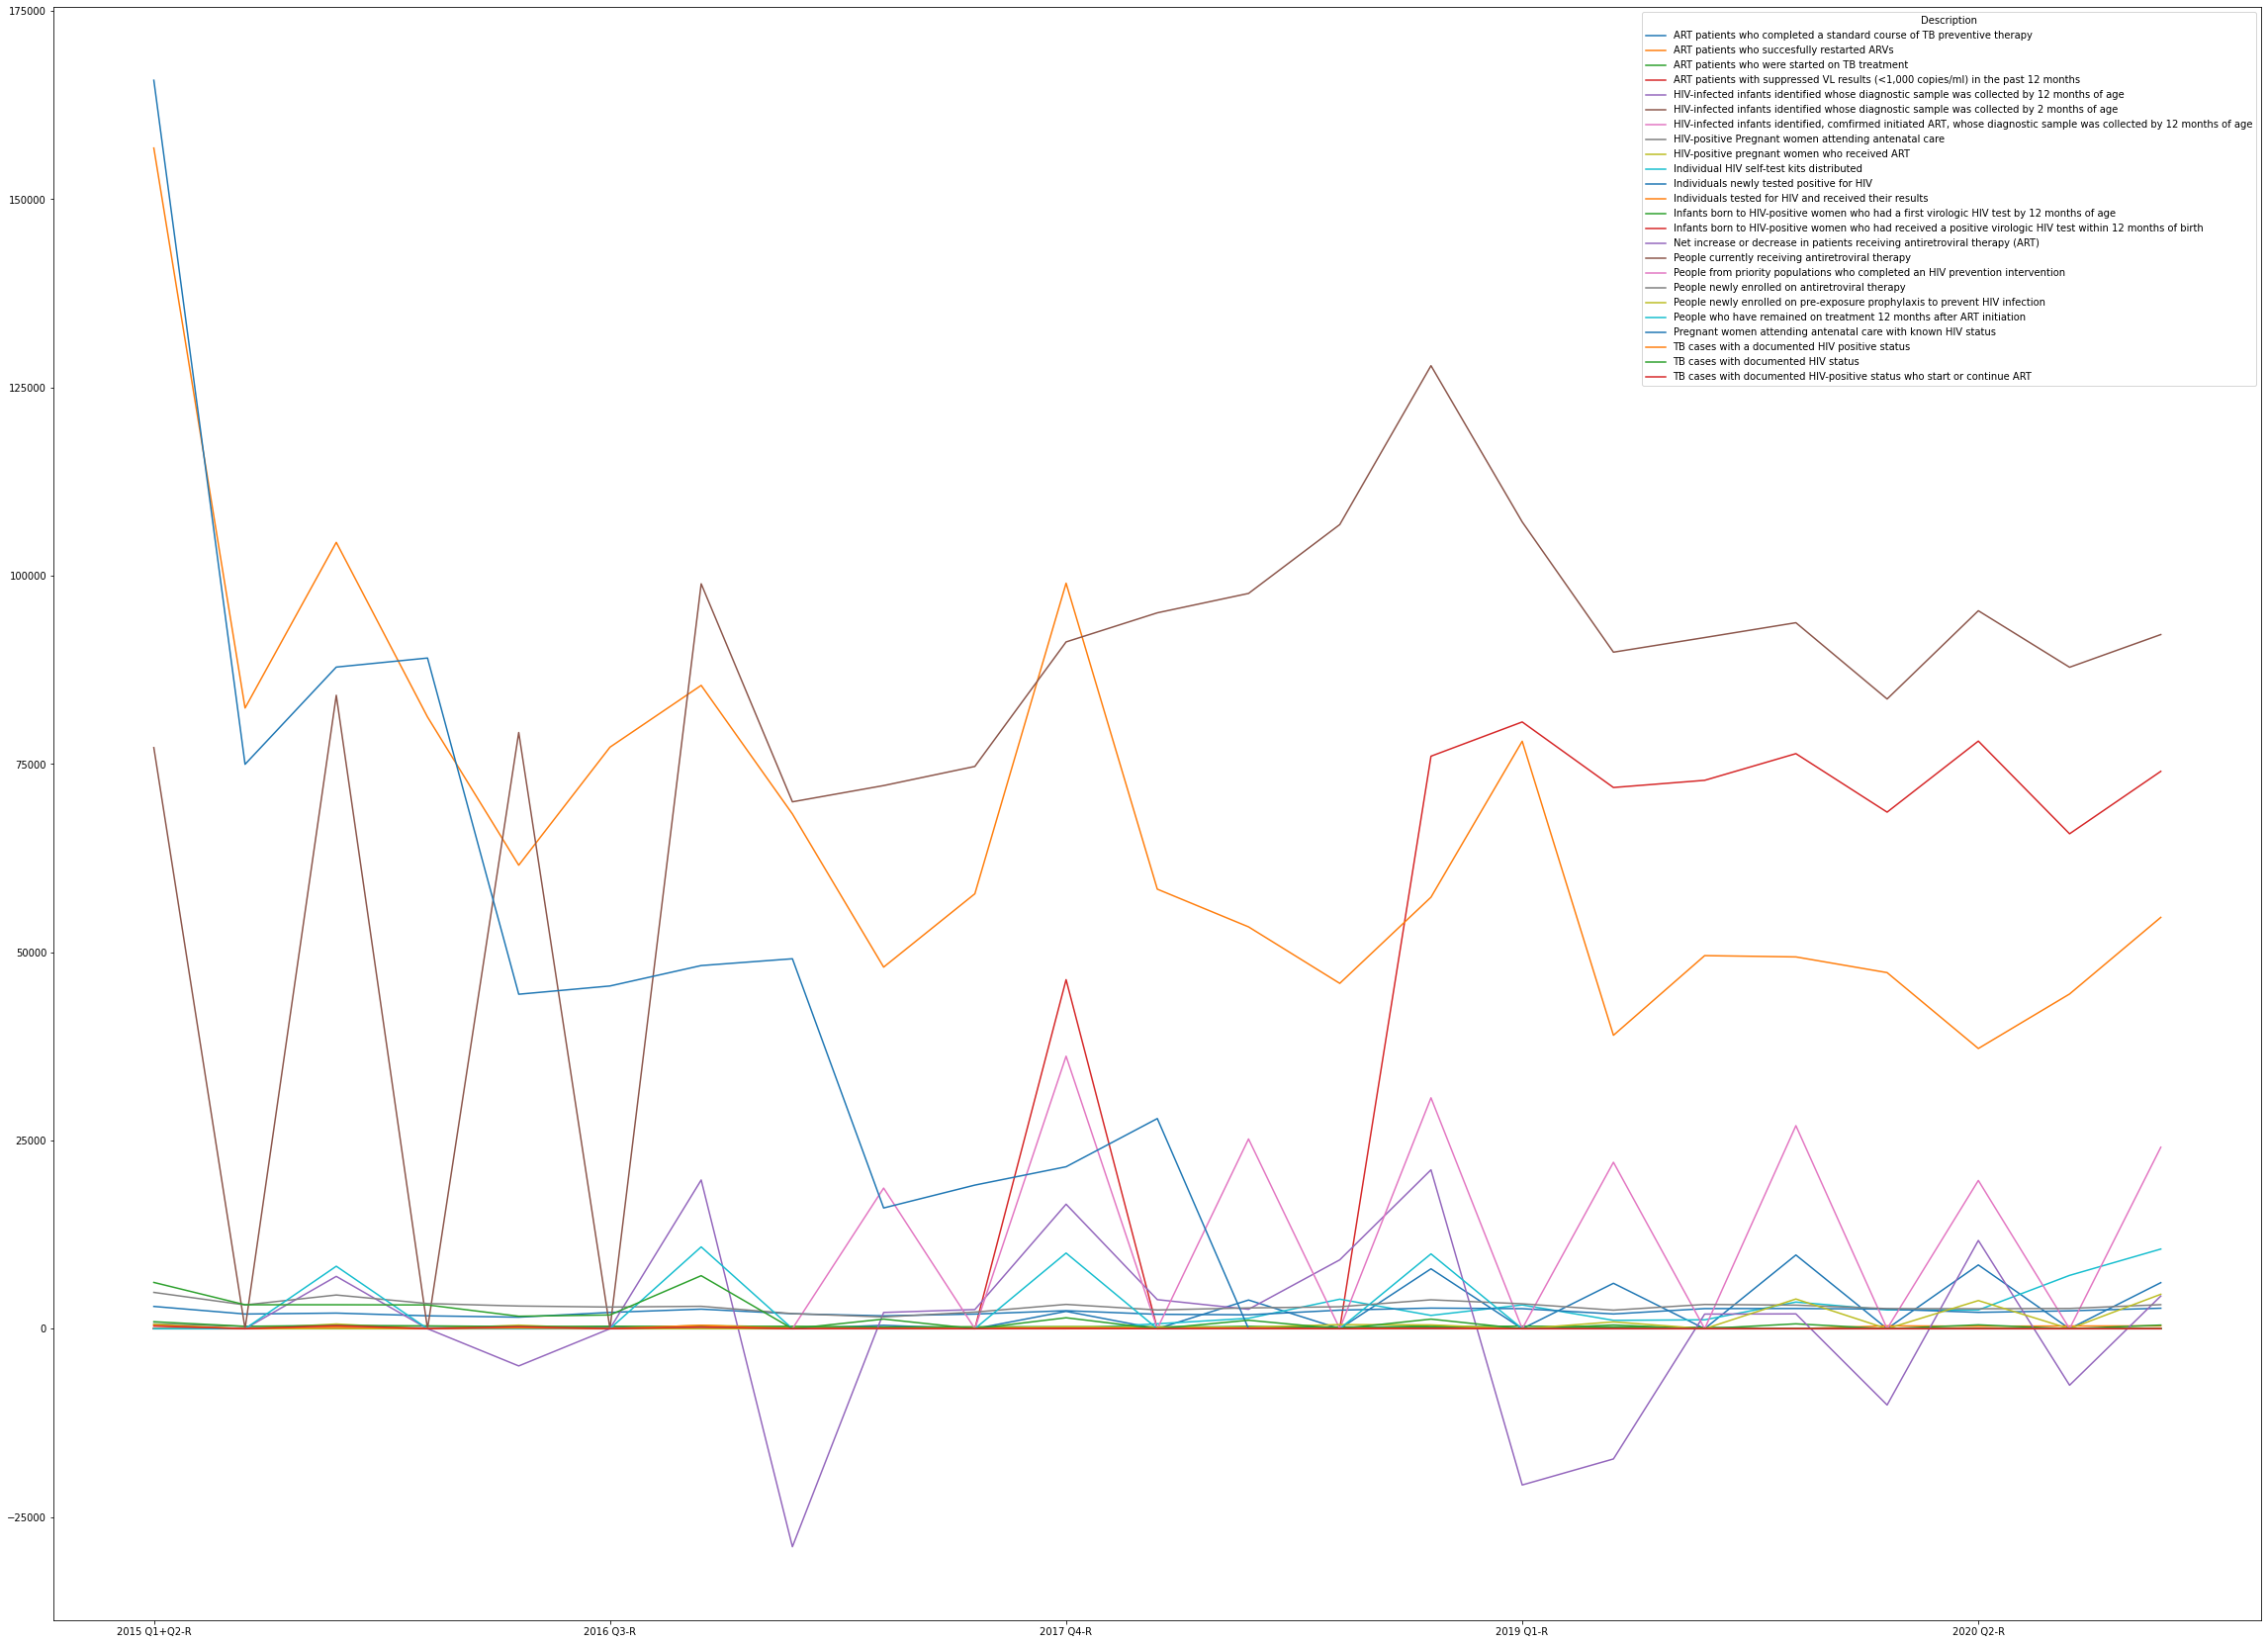

In [52]:
vndf_insight.plot(figsize = (40, 30))

As we can see from the chart above, TX_CURR - People currently receiving antiretroviral therapy, TX_PVLS - ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months has a similar patterns from 2018 Q4 to 2020 Q4

<AxesSubplot:>

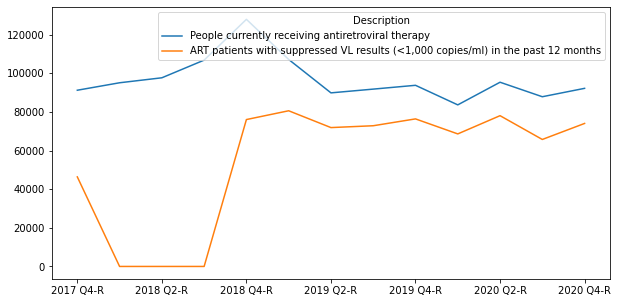

In [53]:
plotvndf = vndf_insight.loc["2017 Q4-R":"2020 Q4-R", ["People currently receiving antiretroviral therapy", "ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months"]]
plotvndf
plotvndf.plot(figsize = (10, 5))

It is noticeable that the number of "Individuals tested for HIV and received their results" declined gradually during analyzing period. The number of "Individual HIV self-test kits distributed" increased slightly from 2020 Q2

<AxesSubplot:>

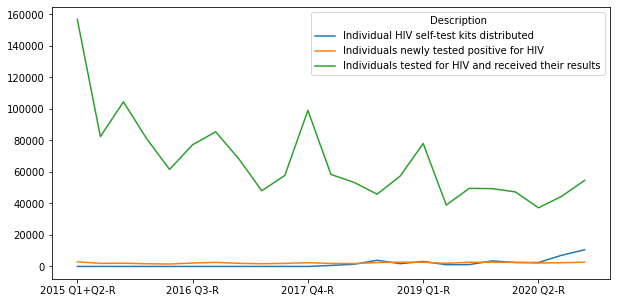

In [54]:
plotvndf = vndf_insight.loc[:, ["Individual HIV self-test kits distributed", "Individuals newly tested positive for HIV", "Individuals tested for HIV and received their results"]]
plotvndf
plotvndf.plot(figsize = (10, 5))

The numnbers of HIV-infected infants identified were reported only from 2017 Q4 to 2019 Q4. There was no captured data or there were no HIV-infected infantes cases before and after that period. 

<AxesSubplot:>

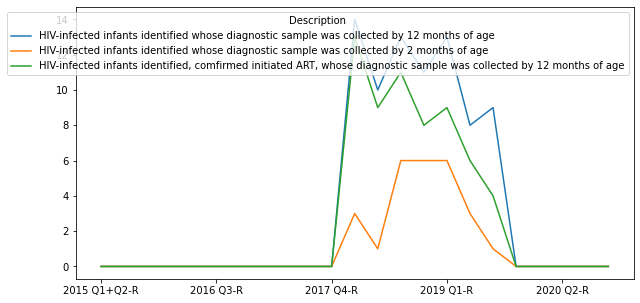

In [55]:
plotvndf = vndf_insight.loc[:, ["HIV-infected infants identified whose diagnostic sample was collected by 12 months of age", "HIV-infected infants identified whose diagnostic sample was collected by 2 months of age", "HIV-infected infants identified, comfirmed initiated ART, whose diagnostic sample was collected by 12 months of age"]]
plotvndf
plotvndf.plot(figsize = (10, 5))

There were no "HIV-positive pregnant women who received ART" and "HIV-positive Pregnant women attending antenatal care" captured after 2018 Q1 until the end of 2020

<AxesSubplot:>

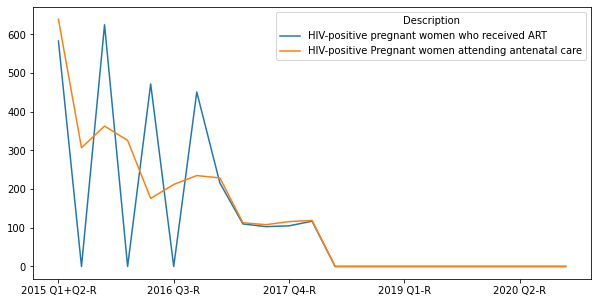

In [56]:
plotvndf = vndf_insight.loc[:, ["HIV-positive pregnant women who received ART", "HIV-positive Pregnant women attending antenatal care"]]
plotvndf.plot(figsize = (10, 5))

There was no pregnant women attending antenatal care with known HIV status from 2018 Q2

<AxesSubplot:>

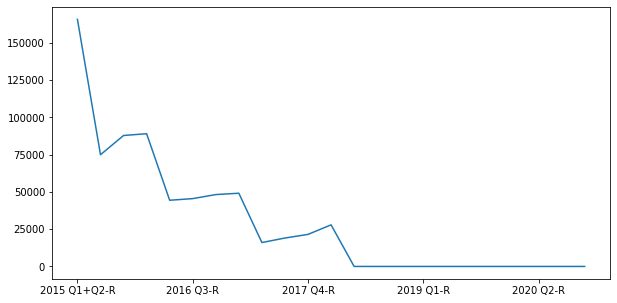

In [57]:
plotvndf = vndf_insight.loc[:, "Pregnant women attending antenatal care with known HIV status"]
plotvndf.plot(figsize = (10, 5))

There was no infants born to HIV-positive women who had received a positive virologic HIV test within 12 months of birth from 2018 Q1

<AxesSubplot:>

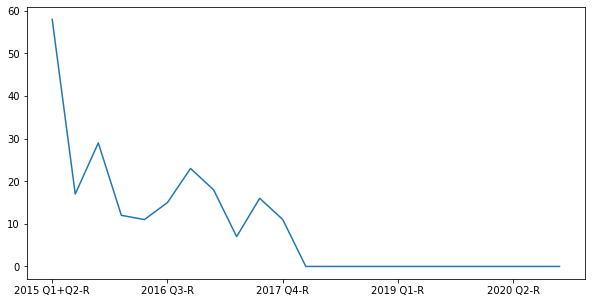

In [58]:
plotvndf = vndf_insight.loc[:, "Infants born to HIV-positive women who had received a positive virologic HIV test within 12 months of birth"]
plotvndf
plotvndf.plot(figsize = (10, 5))

## The report below shows how "Individuals newly tested positive for HIV" had been changed in the rating period in provinces in Vietnam

In [64]:
htsdf = vndf.loc[vndf['Indicator'] == 'HTS_TST_POS']
htsdf

Report Name Operating Unit        PSNU         Facility  \
460869  7. Site Performance        Vietnam    An Giang  Facility 1119c1   
460881  7. Site Performance        Vietnam    An Giang  Facility 373f60   
460884  7. Site Performance        Vietnam    An Giang  Facility 4260cb   
460910  7. Site Performance        Vietnam    An Giang  Facility 60f03b   
460925  7. Site Performance        Vietnam    An Giang  Facility 635e3e   
...                     ...            ...         ...              ...   
463648  7. Site Performance        Vietnam  Tien Giang  Facility 68ea75   
463658  7. Site Performance        Vietnam  Tien Giang  Facility 82a9b6   
463661  7. Site Performance        Vietnam  Tien Giang              NaN   
463671  7. Site Performance        Vietnam   Vinh Long  Facility 8be2ab   
463689  7. Site Performance        Vietnam   Vinh Long  Facility c12e97   

          Indicator                                Description  2015 Q1+Q2-R  \
460869  HTS_TST_POS  Individuals newly tested positive for HIV          42.0   
460881  HTS_TST_POS  Individuals newly tested positive for HIV          25.0   
460884  HTS_TST_POS  Individuals newly tested positive for HIV          29.0   
460910  HTS_TST_POS  Individuals newly tested positive for HIV           NaN   
460925  HTS_TST_POS  Individuals newly tested positive for HIV           4.0   
...             ...                                        ...           ...   
463648  HTS_TST_POS  Individuals newly tested positive for HIV           NaN   
463658  HTS_TST_POS  Individuals newly tested positive for HIV           NaN   
463661  HTS_TST_POS  Individuals newly tested positive for HIV           NaN   
463671  HTS_TST_POS  Individuals newly tested positive for HIV           1.0   
463689  HTS_TST_POS  Individuals newly tested positive for HIV          34.0   

        2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  2016 Q3-R  2016 Q4-R  \
460869       10.0       18.0       14.0       12.0       14.0       20.0   
460881        6.0        6.0        9.0        7.0        8.0        9.0   
460884        8.0        4.0        7.0        5.0       10.0        5.0   
460910        1.0        NaN        1.0        NaN        NaN        NaN   
460925        2.0        1.0        3.0        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
463648        NaN        NaN        NaN        NaN        NaN        NaN   
463658        NaN        NaN        NaN        NaN        NaN        NaN   
463661        NaN        NaN        NaN        NaN        NaN        NaN   
463671        NaN        NaN        NaN        NaN        NaN        NaN   
463689       26.0       19.0       14.0       17.0       15.0       12.0   

        2017 Q1-R  2017 Q2-R  2017 Q3-R  2017 Q4-R  2018 Q1-R  2018 Q2-R  \
460869       24.0       21.0       22.0       31.0       39.0       31.0   
460881        8.0        7.0        1.0        6.0       15.0        7.0   
460884       10.0        6.0        5.0        9.0        9.0        4.0   
460910        NaN        NaN        NaN        NaN        NaN        NaN   
460925        NaN        NaN        NaN        NaN        NaN        1.0   
...           ...        ...        ...        ...        ...        ...   
463648        NaN        NaN        NaN        NaN        NaN        NaN   
463658        NaN        NaN        NaN        NaN        NaN        NaN   
463661        NaN        NaN        NaN        NaN        NaN        NaN   
463671        2.0        NaN        NaN        1.0        NaN        NaN   
463689       14.0       20.0       28.0       12.0       19.0       23.0   

        2018 Q3-R  2018 Q4-R  2019 Q1-R  2019 Q2-R  2019 Q3-R  2019 Q4-R  \
460869       23.0       31.0       31.0        NaN        NaN        NaN   
460881        7.0        7.0        NaN        NaN        NaN        NaN   
460884        3.0        9.0        NaN        NaN        NaN        NaN   
460910        NaN       

In [65]:
dataplot = htsdf.groupby("PSNU").sum()
dataplot

2015 Q1+Q2-R  2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  \
PSNU                                                                         
An Giang                 122.0       38.0       45.0       43.0       33.0   
Ba Ria-Vung Tau           91.0       31.0       30.0       50.0       32.0   
Bac Ninh                  32.0       24.0       29.0       11.0       18.0   
Binh Duong               177.0       99.0      112.0       73.0       81.0   
Binh Thuan                18.0        5.0        7.0        7.0        0.0   
Can Tho                   21.0       16.0       10.0       13.0       16.0   
Cao Bang                  11.0        4.0       11.0        6.0        4.0   
Da Nang                   28.0        0.0        0.0        0.0        0.0   
Dak Lak                   35.0       18.0       28.0       22.0        0.0   
Dien Bien                 83.0       47.0       44.0      105.0      197.0   
Dong Nai                   0.0        0.0        0.0        0.0        0.0   
Ha Noi                   296.0      149.0      182.0      108.0       74.0   
Hai Duong                 45.0       38.0       58.0       23.0        0.0   
Hai Phong                126.0      135.0       88.0       41.0       28.0   
Ho Chi Minh City         784.0      654.0      703.0      594.0      549.0   
Hoa Binh                  14.0        9.0       19.0       14.0        4.0   
Khanh Hoa                 26.0       18.0       13.0       17.0        0.0   
Kien Giang                19.0       18.0       18.0       22.0       10.0   
Lang Son                   4.0        8.0        7.0       17.0        0.0   
Lao Cai                   53.0       24.0       22.0       22.0        6.0   
Long An                   23.0       18.0       27.0       15.0       11.0   
Nam Dinh                  58.0       25.0       32.0       26.0       27.0   
Nghe An                  292.0      191.0      216.0      182.0      187.0   
Ninh Binh                  0.0        3.0        1.0        0.0        0.0   
Quang Nam                 24.0       12.0        7.0        7.0        0.0   
Quang Ninh               140.0       95.0       60.0       37.0       18.0   
Soc Trang                 34.0       17.0       17.0       17.0       12.0   
Son La                    73.0       77.0       80.0       73.0       51.0   
Tay Ninh                  46.0       22.0       25.0       24.0       13.0   
Thai Binh                 32.0       20.0       22.0       32.0       27.0   
Thai Nguyen               61.0       23.0       27.0       23.0       23.0   
Thanh Hoa                157.0       87.0      115.0       73.0       93.0   
Tien Giang                 0.0        0.0        0.0        0.0        0.0   
Vinh Long                 35.0       26.0       19.0       14.0       17.0   

                  2016 Q3-R  2016 Q4-R  2017 Q1-R  2017 Q2-R  2017 Q3-R  \
PSNU                                                                      
An Giang               48.0       45.0       53.0       42.0       31.0   
Ba Ria-Vung Tau        28.0       21.0       13.0       27.0       45.0   
Bac Ninh                6.0       17.0       14.0       46.0       11.0   
Binh Duong             82.0       77.0       71.0       51.0       68.0   
Binh Thuan              0.0        0.0        0.0        0.0        0.0   
Can Tho                12.0       28.0        0.0        0.0        2.0   
Cao Bang                0.0        0.0        0.0        0.0        0.0   
Da Nang                 0.0        0.0        0.0        0.0        0.0   
Dak Lak                 0.0        0.0        0.0        0.0        0.0   
Dien Bien             157.0      224.0      119.0      146.0      112.0   
Dong Nai                0.0        0.0        0.0        0.0        0.0   
Ha Noi                130.0      159.0       67.0       63.0       96.0   
Hai Duong               0.0        0.0        0.0        0.0        0.0   
Hai Phong              24.0       45.0       29.0       36.0       33.0   
Ho Chi Mi

In [66]:
dataplot.describe(include = 'all')

2015 Q1+Q2-R   2015 Q3-R   2015 Q4-R   2016 Q1-R   2016 Q2-R  \
count     34.000000   34.000000   34.000000   34.000000   34.000000   
mean      87.058824   57.382353   61.000000   50.323529   45.029412   
std      143.589470  115.088639  123.923975  103.371270  100.935769   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%       21.500000   13.000000   11.500000   13.250000    0.000000   
50%       35.000000   22.500000   26.000000   22.000000   14.500000   
75%       89.000000   44.750000   54.750000   42.500000   31.000000   
max      784.000000  654.000000  703.000000  594.000000  549.000000   

        2016 Q3-R   2016 Q4-R   2017 Q1-R   2017 Q2-R   2017 Q3-R   2017 Q4-R  \
count   34.000000   34.000000   34.000000   34.000000   34.000000   34.000000   
mean    63.705882   76.411765   58.411765   50.294118   57.205882   70.382353   
std    147.579569  175.498790  167.352308  136.431030  155.509286  171.122677   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     15.000000   22.000000   15.000000   20.000000   23.000000   12.500000   
75%     42.750000   45.000000   41.000000   40.500000   32.500000   43.500000   
max    803.000000  961.000000  967.000000  791.000000  901.000000  876.000000   

         2018 Q1-R   2018 Q2-R    2018 Q3-R    2018 Q4-R    2019 Q1-R  \
count    34.000000   34.000000    34.000000    34.000000    34.000000   
mean     56.294118   54.323529    72.529412    80.500000    78.264706   
std     184.727568  148.593144   257.593200   276.483464   236.504892   
min       0.000000    0.000000     0.000000     0.000000     0.000000   
25%       0.000000    0.000000     0.000000     0.000000     0.000000   
50%      10.000000   10.500000     9.000000    25.500000    15.500000   
75%      28.250000   27.500000    34.000000    48.750000    74.250000   
max    1079.000000  837.000000  1505.000000  1623.000000  1368.000000   

         2019 Q2-R    2019 Q3-R    2019 Q4-R    2020 Q1-R    2020 Q2-R  \
count    34.000000    34.000000    34.000000    34.000000    34.000000   
mean     57.588235    78.529412    78.911765    76.588235    63.852941   
std     193.217591   230.304309   234.158631   253.617956   189.004430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%      38.500000    62.750000    62.500000    57.500000    54.750000   
max    1081.000000  1238.000000  1303.000000  1447.000000  1066.000000   

         2020 Q3-R    2020 Q4-R  
count    34.000000    34.000000  
mean     69.794118    80.029412  
std     187.529356   233.614872  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%      64.250000    59.750000  
max    1014.000000  1300.000000

Transform the dataframe

In [68]:
dataplot = dataplot.T
dataplot

PSNU          An Giang  Ba Ria-Vung Tau  Bac Ninh  Binh Duong  Binh Thuan  \
2015 Q1+Q2-R     122.0             91.0      32.0       177.0        18.0   
2015 Q3-R         38.0             31.0      24.0        99.0         5.0   
2015 Q4-R         45.0             30.0      29.0       112.0         7.0   
2016 Q1-R         43.0             50.0      11.0        73.0         7.0   
2016 Q2-R         33.0             32.0      18.0        81.0         0.0   
2016 Q3-R         48.0             28.0       6.0        82.0         0.0   
2016 Q4-R         45.0             21.0      17.0        77.0         0.0   
2017 Q1-R         53.0             13.0      14.0        71.0         0.0   
2017 Q2-R         42.0             27.0      46.0        51.0         0.0   
2017 Q3-R         31.0             45.0      11.0        68.0         0.0   
2017 Q4-R         48.0             53.0       5.0        83.0         0.0   
2018 Q1-R         72.0              0.0       6.0        63.0         0.0   
2018 Q2-R         44.0             16.0       1.0        79.0         0.0   
2018 Q3-R         34.0             27.0       2.0        74.0         0.0   
2018 Q4-R         48.0             61.0       4.0        93.0         0.0   
2019 Q1-R         31.0             54.0       1.0        90.0         0.0   
2019 Q2-R          0.0             39.0       0.0        68.0         0.0   
2019 Q3-R          0.0            106.0       0.0       119.0         0.0   
2019 Q4-R          0.0             61.0       0.0       129.0         0.0   
2020 Q1-R          0.0             59.0       0.0       127.0         0.0   
2020 Q2-R          0.0             54.0       0.0       109.0         0.0   
2020 Q3-R          0.0             62.0       0.0       204.0         0.0   
2020 Q4-R          0.0             53.0       0.0       186.0         0.0   

PSNU          Can Tho  Cao Bang  Da Nang  Dak Lak  Dien Bien  Dong Nai  \
2015 Q1+Q2-R     21.0      11.0     28.0     35.0       83.0       0.0   
2015 Q3-R        16.0       4.0      0.0     18.0       47.0       0.0   
2015 Q4-R        10.0      11.0      0.0     28.0       44.0       0.0   
2016 Q1-R        13.0       6.0      0.0     22.0      105.0       0.0   
2016 Q2-R        16.0       4.0      0.0      0.0      197.0       0.0   
2016 Q3-R        12.0       0.0      0.0      0.0      157.0       0.0   
2016 Q4-R        28.0       0.0      0.0      0.0      224.0       0.0   
2017 Q1-R         0.0       0.0      0.0      0.0      119.0       0.0   
2017 Q2-R         0.0       0.0      0.0      0.0      146.0       0.0   
2017 Q3-R         2.0       0.0      0.0      0.0      112.0       0.0   
2017 Q4-R         0.0       0.0      0.0      0.0       99.0       0.0   
2018 Q1-R         0.0       0.0      0.0      0.0       96.0       0.0   
2018 Q2-R         0.0       0.0      0.0      0.0      149.0       0.0   
2018 Q3-R         0.0       0.0      0.0      0.0       34.0       0.0   
2018 Q4-R         0.0       0.0      0.0      0.0       25.0      29.0   
2019 Q1-R         0.0       0.0      0.0      0.0        0.0     123.0   
2019 Q2-R         0.0       0.0      0.0      0.0        0.0      90.0   
2019 Q3-R         0.0       0.0      0.0      0.0        0.0     214.0   
2019 Q4-R         0.0       0.0      0.0      0.0        0.0     267.0   
2020 Q1-R         0.0       0.0      0.0      0.0        0.0     162.0   
2020 Q2-R         0.0       0.0      0.0      0.0        0.0     209.0   
2020 Q3-R         0.0       0.0      0.0      0.0        0.0     181.0   
2020 Q4-R         0.0       0.0      0.0      0.0        0.0     245.0   

PSNU          Ha Noi  Hai Duong  Hai Phong  Ho Chi Minh City  Hoa Binh  \
2015 Q1+Q2-R   296.0       45.0      126.0             784.0      14.0   
2015 Q3-R      149.0       38.0      135.0             654.0       9.0   
2015 Q4-R      182.0       58.0       88.0             703.0      19.0   
2016 Q1-R      108.0       23.0       41.0             594.0      14.0   
2016

Plot the dataframe to the line chart. It is noticeable that Ho Chi Minh City has the most "Individuals newly tested positive for HIV"

<AxesSubplot:>

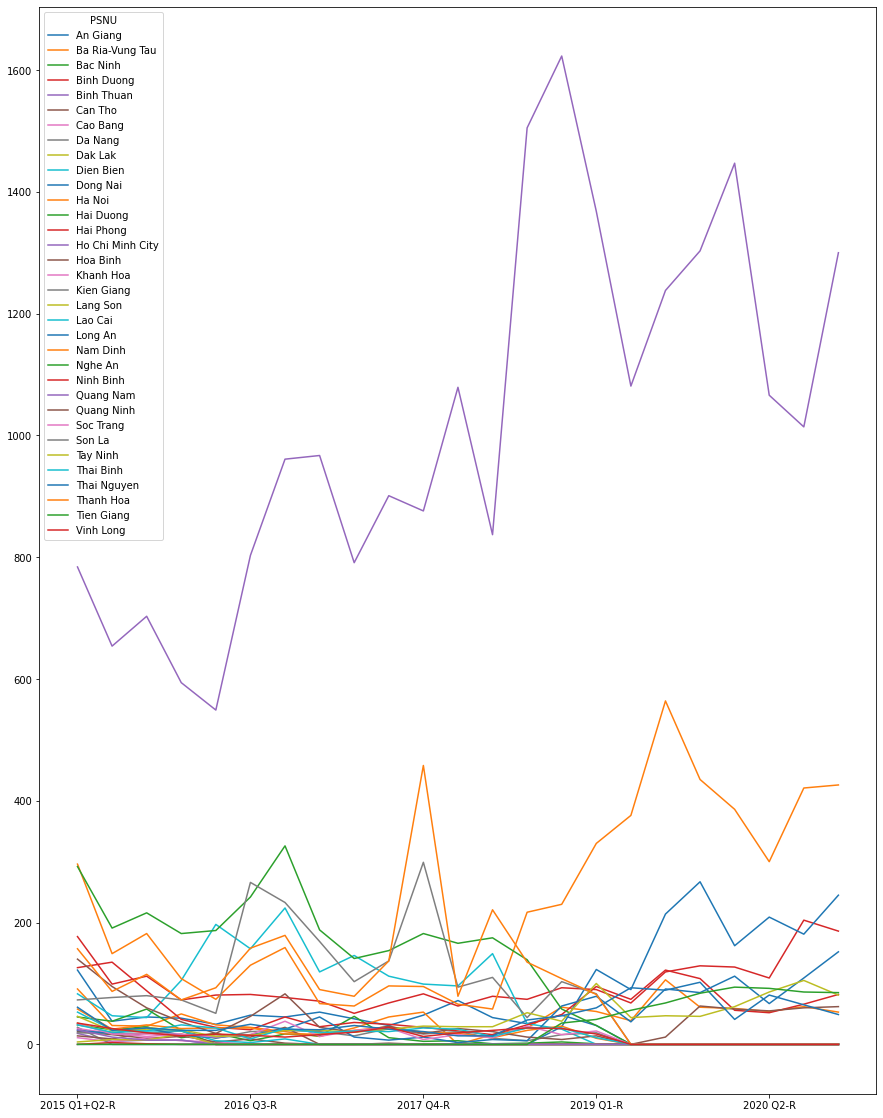

In [70]:
dataplot.plot(figsize=(15, 20))

## The report below shows the status of "TX_CURR People currently receiving antiretroviral therapy"

In [71]:
vntx_curr = vndf.loc[vndf['Indicator'] == 'TX_CURR']
vntx_curr = vntx_curr.groupby("PSNU").sum()
vntx_curr

2015 Q1+Q2-R  2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  \
PSNU                                                                         
An Giang                4264.0        0.0     3836.0        0.0     4952.0   
Ba Ria-Vung Tau         2412.0        0.0     2558.0        0.0     2942.0   
Bac Giang                308.0        0.0      321.0        0.0      352.0   
Bac Ninh                 750.0        0.0      769.0        0.0      439.0   
Binh Duong              2709.0        0.0     2800.0        0.0     3421.0   
Binh Thuan               629.0        0.0      699.0        0.0        0.0   
Can Tho                 1019.0        0.0     1077.0        0.0     1119.0   
Cao Bang                 804.0        0.0      854.0        0.0      874.0   
Da Nang                  263.0        0.0        0.0        0.0        0.0   
Dien Bien               1577.0        0.0     1668.0        0.0     2718.0   
Dong Nai                   0.0        0.0        0.0        0.0        0.0   
Ha Noi                 12477.0        0.0    12404.0        0.0     9577.0   
Hai Phong               3648.0        0.0     3860.0        0.0     2595.0   
Ho Chi Minh City       25637.0        0.0    31136.0        0.0    28989.0   
Hoa Binh                1328.0        0.0     1471.0        0.0     1460.0   
Kien Giang               467.0        0.0        0.0        0.0        0.0   
Lao Cai                  463.0        0.0      576.0        0.0      653.0   
Long An                 1268.0        0.0     1313.0        0.0     1367.0   
Nam Dinh                 434.0        0.0      479.0        0.0      475.0   
Nghe An                 3466.0        0.0     4041.0        0.0     4761.0   
Ninh Binh                 97.0        0.0      164.0        0.0      169.0   
Quang Nam                432.0        0.0      507.0        0.0      278.0   
Quang Ninh              4368.0        0.0     4408.0        0.0     3383.0   
Soc Trang               1112.0        0.0     1181.0        0.0      701.0   
Son La                  4066.0        0.0     4771.0        0.0     5082.0   
Tay Ninh                   0.0        0.0        0.0        0.0        0.0   
Thai Binh               1697.0        0.0     1643.0        0.0     1916.0   
Thai Nguyen                0.0        0.0        0.0        0.0        0.0   
Thanh Hoa                  0.0        0.0        0.0        0.0       94.0   
Tien Giang                 0.0        0.0        0.0        0.0        0.0   
Vinh Long               1476.0        0.0     1586.0        0.0      861.0   

                  2016 Q3-R  2016 Q4-R  2017 Q1-R  2017 Q2-R  2017 Q3-R  \
PSNU                                                                      
An Giang                0.0     7021.0     5048.0     3105.0     4497.0   
Ba Ria-Vung Tau         0.0     3032.0     1347.0     1218.0     1193.0   
Bac Giang               0.0      368.0      375.0      388.0      414.0   
Bac Ninh                0.0      902.0      469.0      903.0      468.0   
Binh Duong              0.0     3209.0     2792.0     1220.0     2758.0   
Binh Thuan              0.0        0.0        0.0        0.0        0.0   
Can Tho                 0.0     1148.0     1128.0     1143.0     1276.0   
Cao Bang                0.0      908.0      892.0      469.0      480.0   
Da Nang                 0.0        0.0        0.0        0.0        0.0   
Dien Bien               0.0     2832.0     2845.0     2894.0     2975.0   
Dong Nai                0.0        0.0        0.0        0.0        0.0   
Ha Noi                  0.0    14237.0     9000.0     8314.0    12497.0   
Hai Phong               0.0     3823.0     3863.0     2313.0     2343.0   
Ho Chi Minh City        0.0    33097.0    20884.0    28643.0    21184.0   
Hoa Binh                0.0     1500.0      798.0      770.0      755.0   
Kien Giang              0.0        0.0        0.0        0.0        0.0   
Lao Cai                 0.0      684.0      674.0      646.0      641.0   
Long An           

Pick "2020 Q4" as the latest period to plot data to Vietnam map

In [73]:
vntx_curr.sort_values(by = "2020 Q4-R", ascending=False)

2015 Q1+Q2-R  2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  \
PSNU                                                                         
Ho Chi Minh City       25637.0        0.0    31136.0        0.0    28989.0   
Ha Noi                 12477.0        0.0    12404.0        0.0     9577.0   
Thai Nguyen                0.0        0.0        0.0        0.0        0.0   
Binh Duong              2709.0        0.0     2800.0        0.0     3421.0   
Hai Phong               3648.0        0.0     3860.0        0.0     2595.0   
Quang Ninh              4368.0        0.0     4408.0        0.0     3383.0   
Dong Nai                   0.0        0.0        0.0        0.0        0.0   
Ba Ria-Vung Tau         2412.0        0.0     2558.0        0.0     2942.0   
Long An                 1268.0        0.0     1313.0        0.0     1367.0   
Tay Ninh                   0.0        0.0        0.0        0.0        0.0   
Tien Giang                 0.0        0.0        0.0        0.0        0.0   
An Giang                4264.0        0.0     3836.0        0.0     4952.0   
Quang Nam                432.0        0.0      507.0        0.0      278.0   
Soc Trang               1112.0        0.0     1181.0        0.0      701.0   
Nghe An                 3466.0        0.0     4041.0        0.0     4761.0   
Son La                  4066.0        0.0     4771.0        0.0     5082.0   
Thai Binh               1697.0        0.0     1643.0        0.0     1916.0   
Thanh Hoa                  0.0        0.0        0.0        0.0       94.0   
Ninh Binh                 97.0        0.0      164.0        0.0      169.0   
Kien Giang               467.0        0.0        0.0        0.0        0.0   
Nam Dinh                 434.0        0.0      479.0        0.0      475.0   
Lao Cai                  463.0        0.0      576.0        0.0      653.0   
Hoa Binh                1328.0        0.0     1471.0        0.0     1460.0   
Dien Bien               1577.0        0.0     1668.0        0.0     2718.0   
Da Nang                  263.0        0.0        0.0        0.0        0.0   
Cao Bang                 804.0        0.0      854.0        0.0      874.0   
Can Tho                 1019.0        0.0     1077.0        0.0     1119.0   
Binh Thuan               629.0        0.0      699.0        0.0        0.0   
Bac Ninh                 750.0        0.0      769.0        0.0      439.0   
Bac Giang                308.0        0.0      321.0        0.0      352.0   
Vinh Long               1476.0        0.0     1586.0        0.0      861.0   

                  2016 Q3-R  2016 Q4-R  2017 Q1-R  2017 Q2-R  2017 Q3-R  \
PSNU                                                                      
Ho Chi Minh City        0.0    33097.0    20884.0    28643.0    21184.0   
Ha Noi                  0.0    14237.0     9000.0     8314.0    12497.0   
Thai Nguyen             0.0        0.0        0.0        0.0        0.0   
Binh Duong              0.0     3209.0     2792.0     1220.0     2758.0   
Hai Phong               0.0     3823.0     3863.0     2313.0     2343.0   
Quang Ninh              0.0     4732.0     3317.0     3324.0     3305.0   
Dong Nai                0.0        0.0        0.0        0.0        0.0   
Ba Ria-Vung Tau         0.0     3032.0     1347.0     1218.0     1193.0   
Long An                 0.0     1222.0      607.0      576.0     1062.0   
Tay Ninh                0.0        0.0        0.0        0.0        0.0   
Tien Giang              0.0        0.0        0.0        0.0        0.0   
An Giang                0.0     7021.0     5048.0     3105.0     4497.0   
Quang Nam               0.0      300.0      309.0      322.0      633.0   
Soc Trang               0.0     1506.0      773.0      807.0      836.0   
Nghe An                 0.0     5248.0     3781.0     5208.0     5199.0   
Son La                  0.0     5651.0     4399.0     3694.0     5688.0   
Thai Binh               0.0     1986.0     1735.0     1733.0     1765.0   
Thanh Hoa         

In [74]:
state_geo = "diaphantinhenglish.geojson"
state_data = vntx_curr

m = folium.Map(location=[16.7403, 107.1855], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns = [vntx_curr.index.values, "2020 Q4-R"],
    key_on="feature.properties.Name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="People currently receiving antiretroviral therapy in Q4 - 2020",
).add_to(m)

folium.LayerControl().add_to(m)

m

### Map published by [Open Vietnam](https://data.vietnam.opendevelopmentmekong.net/vi/dataset/a-phn-tnh)

Since Ho Chi Minh City has the most individuals newly tested positive for HIV in serveral years from 2015 until the end of 2020, the report below show more insight about Ho Chi Minh City with provided indicators 

## Ho Chi Minh City Insight

### Locate Ho Chi Minh City Data

In [93]:
dfhcmc = vndf[vndf['PSNU'] == 'Ho Chi Minh City']
dfhcmc

Report Name Operating Unit              PSNU         Facility  \
461891  7. Site Performance        Vietnam  Ho Chi Minh City  Facility 07a53f   
461892  7. Site Performance        Vietnam  Ho Chi Minh City  Facility 07a53f   
461893  7. Site Performance        Vietnam  Ho Chi Minh City  Facility 07a53f   
461894  7. Site Performance        Vietnam  Ho Chi Minh City  Facility 07a53f   
461895  7. Site Performance        Vietnam  Ho Chi Minh City  Facility 07a53f   
...                     ...            ...               ...              ...   
462434  7. Site Performance        Vietnam  Ho Chi Minh City  Facility fea032   
462435  7. Site Performance        Vietnam  Ho Chi Minh City              NaN   
462436  7. Site Performance        Vietnam  Ho Chi Minh City              NaN   
462437  7. Site Performance        Vietnam  Ho Chi Minh City              NaN   
462438  7. Site Performance        Vietnam  Ho Chi Minh City              NaN   

          Indicator                                        Description  \
461891  HTS_TST_POS          Individuals newly tested positive for HIV   
461892      HTS_TST  Individuals tested for HIV and received their ...   
461893  TB_STAT_POS     TB cases with a documented HIV positive status   
461894      TB_STAT                TB cases with documented HIV status   
461895       TB_ART  TB cases with documented HIV-positive status w...   
...             ...                                                ...   
462434       TB_ART  TB cases with documented HIV-positive status w...   
462435      PP_PREV  People from priority populations who completed...   
462436     HTS_SELF          Individual HIV self-test kits distributed   
462437  HTS_TST_POS          Individuals newly tested positive for HIV   
462438      HTS_TST  Individuals tested for HIV and received their ...   

        2015 Q1+Q2-R  2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  2016 Q3-R  \
461891           NaN        9.0       12.0        2.0        3.0        3.0   
461892           NaN      205.0      712.0      176.0      149.0      178.0   
461893          23.0        NaN        9.0        NaN        9.0        NaN   
461894         367.0      205.0      178.0      187.0      159.0      189.0   
461895          14.0        NaN       17.0        NaN       18.0        NaN   
...              ...        ...        ...        ...        ...        ...   
462434          11.0        NaN       12.0        NaN        3.0        NaN   
462435           NaN        NaN        NaN        NaN        NaN        NaN   
462436           NaN        NaN        NaN        NaN        NaN        NaN   
462437           NaN        NaN        NaN       14.0       75.0      257.0   
462438           NaN        NaN        NaN      130.0      926.0     4099.0   

        2016 Q4-R  2017 Q1-R  2017 Q2-R  2017 Q3-R  2017 Q4-R  2018 Q1-R  \
461891        1.0        5.0        NaN        NaN        NaN        NaN   
461892      166.0      154.0        NaN        NaN        NaN        NaN   
461893       45.0        NaN        NaN        NaN        NaN        NaN   
461894      712.0        NaN        NaN        NaN        NaN        NaN   
461895       23.0        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
462434        NaN        NaN        NaN        NaN        NaN        NaN   
462435        NaN        NaN     1174.0        NaN     3953.0        NaN   
462436        NaN        NaN        NaN        NaN        NaN      602.0   
462437      453.0      467.0      370.0      383.0      305.0      391.0   
462438     7184.0     6695.0     6992.0     5396.0     6887.0     6661.0   

        2018 Q2-R  2018 Q3-R  2018 Q4-R  2019 Q1-R  2019 Q2-R  2019 Q3-R  \
461891        NaN        NaN        NaN        NaN        NaN        NaN   
461892        NaN        NaN        NaN        NaN        NaN        NaN   
461893        NaN        NaN        NaN        NaN        NaN   

In [94]:
dfhcmc = dfhcmc[['Indicator', 'Facility', 'Description', '2015 Q1+Q2-R', '2015 Q3-R' , '2015 Q4-R',	'2016 Q1-R', '2016 Q2-R', '2016 Q3-R', '2016 Q4-R',	'2017 Q1-R', '2017 Q2-R',	'2017 Q3-R', '2017 Q4-R', '2018 Q1-R', '2018 Q2-R',	'2018 Q3-R', '2018 Q4-R', '2019 Q1-R', '2019 Q2-R', '2019 Q3-R', '2019 Q4-R', '2020 Q1-R', '2020 Q2-R', '2020 Q3-R', '2020 Q4-R']]
dfhcmc

Indicator         Facility  \
461891  HTS_TST_POS  Facility 07a53f   
461892      HTS_TST  Facility 07a53f   
461893  TB_STAT_POS  Facility 07a53f   
461894      TB_STAT  Facility 07a53f   
461895       TB_ART  Facility 07a53f   
...             ...              ...   
462434       TB_ART  Facility fea032   
462435      PP_PREV              NaN   
462436     HTS_SELF              NaN   
462437  HTS_TST_POS              NaN   
462438      HTS_TST              NaN   

                                              Description  2015 Q1+Q2-R  \
461891          Individuals newly tested positive for HIV           NaN   
461892  Individuals tested for HIV and received their ...           NaN   
461893     TB cases with a documented HIV positive status          23.0   
461894                TB cases with documented HIV status         367.0   
461895  TB cases with documented HIV-positive status w...          14.0   
...                                                   ...           ...   
462434  TB cases with documented HIV-positive status w...          11.0   
462435  People from priority populations who completed...           NaN   
462436          Individual HIV self-test kits distributed           NaN   
462437          Individuals newly tested positive for HIV           NaN   
462438  Individuals tested for HIV and received their ...           NaN   

        2015 Q3-R  2015 Q4-R  2016 Q1-R  2016 Q2-R  2016 Q3-R  2016 Q4-R  \
461891        9.0       12.0        2.0        3.0        3.0        1.0   
461892      205.0      712.0      176.0      149.0      178.0      166.0   
461893        NaN        9.0        NaN        9.0        NaN       45.0   
461894      205.0      178.0      187.0      159.0      189.0      712.0   
461895        NaN       17.0        NaN       18.0        NaN       23.0   
...           ...        ...        ...        ...        ...        ...   
462434        NaN       12.0        NaN        3.0        NaN        NaN   
462435        NaN        NaN        NaN        NaN        NaN        NaN   
462436        NaN        NaN        NaN        NaN        NaN        NaN   
462437        NaN        NaN       14.0       75.0      257.0      453.0   
462438        NaN        NaN      130.0      926.0     4099.0     7184.0   

        2017 Q1-R  2017 Q2-R  2017 Q3-R  2017 Q4-R  2018 Q1-R  2018 Q2-R  \
461891        5.0        NaN        NaN        NaN        NaN        NaN   
461892      154.0        NaN        NaN        NaN        NaN        NaN   
461893        NaN        NaN        NaN        NaN        NaN        NaN   
461894        NaN        NaN        NaN        NaN        NaN        NaN   
461895        NaN        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
462434        NaN        NaN        NaN        NaN        NaN        NaN   
462435        NaN     1174.0        NaN     3953.0        NaN     3355.0   
462436        NaN        NaN        NaN        NaN      602.0      647.0   
462437      467.0      370.0      383.0      305.0      391.0      379.0   
462438     6695.0     6992.0     5396.0     6887.0     6661.0     6805.0   

        2018 Q3-R  2018 Q4-R  2019 Q1-R  2019 Q2-R  2019 Q3-R  2019 Q4-R  \
461891        NaN        NaN        NaN        NaN        NaN        NaN   
461892        NaN        NaN        NaN        NaN        NaN        NaN   
461893        NaN        NaN        NaN        NaN        NaN        NaN   
461894        NaN        NaN        NaN        NaN        NaN        NaN   
461895        NaN        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
462434        NaN        NaN        NaN        NaN        NaN        NaN   
462435        NaN     3814.0        NaN     4517.0        NaN     4633.0   
462436     1837.0      481.0      755.0      795.0      159.0      644.0   
462437      665.0      610.0      874.0   

In [95]:
dfhcmc_insight = dfhcmc.groupby(['Description']).sum()
dfhcmc_insight

0.0   
People newly enrolled on antiretroviral therapy        1486.0     1079.0   
People newly enrolled on pre-exposure prophylax...        0.0        0.0   
People who have remained on treatment 12 months...     2106.0        0.0   
Pregnant women attending antenatal care with kn...    35006.0    39124.0   
TB cases with a documented HIV positive status          223.0        0.0   
TB cases with documented HIV status                    3122.0     3115.0   
TB cases with documented HIV-positive status wh...      407.0        0.0   

                                                    2016 Q2-R  2016 Q3-R  \
Description                                                                
ART patients who completed a standard course of...        0.0        0.0   
ART patients who succesfully restarted ARVs               0.0        0.0   
ART patients who were started on TB treatment             0.0        0.0   
ART patients with suppressed VL results (<1,000...        0.0        0.0   
HIV-infected infants identified whose diagnosti...        0.0        0.0   
HIV-infected infants identified whose diagnosti...        0.0        0.0   
HIV-infected infants identified, comfirmed init...        0.0        0.0   
HIV-positive Pregnant women attending antenatal...      115.0      152.0   
HIV-positive pregnant women who received ART            261.0        0.0   
Individual HIV self-test kits distributed                 0.0        0.0   
Individuals newly tested positive for HIV               549.0      803.0   
Individuals tested for HIV and received their r...    26693.0    30541.0   
Infants born to HIV-positive women who had a fi...      105.0      146.0   
Infants born to HIV-positive women who had rece...        4.0        8.0   
Net increase or decrease in patients receiving ...    -2147.0        0.0   
People currently receiving antiretroviral therapy     28989.0        0.0   
People from priority populations who completed ...        0.0        0.0   
People newly enrolled on antiretroviral therapy         949.0      728.0   
People newly enrolled on pre-exposure prophylax...        0.0        0.0   
People who have remained on treatment 12 months...        0.0        0.0   
Pregnant women attending antenatal care with kn...    29072.0    29667.0   
TB cases with a documented HIV positive status           99.0        0.0   
TB cases with documented HIV status                    1610.0     1766.0   
TB cases with documented HIV-positive status wh...      275.0        0.0   

                                                    2016 Q4-R  2017 Q1-R  \
Description                                                                
ART patients who completed a standard course of...        0.0        0.0   
ART patients who succesfully restarted ARVs               0.0        0.0   
ART patients who were started on TB treatment             0.0        0.0   
ART patients with suppressed VL results (<1,000...        0.0        0.0   
HIV-infected infants identified whose diagnosti...        0.0        0.0   
HIV-infected infants identified whose diagnosti...        0.0        0.0   
HIV-infected infants identified, comfirmed init...        0.0        0.0   
HIV-positive Pregnant women attending antenatal...      160.0      160.0   
HIV-positive pregnant women who received ART            302.0      150.0   
Individual HIV self-test kits distributed                 0.0        0.0   
Individuals newly tested positive for HIV               961.0      967.0   
Individuals tested for HIV and received their r...    31317.0    24384.0   
Infants born to HIV-positive women who had a fi...      133.0      178.0   
Infants born to HIV-positive women who had rece...       11.0       10.0   
Net increase or decrease in patients receiving ...     4108.0   -12213.0   
People currently receiving antiretroviral therapy     33097.0    20884.0   
People from priority populations who completed ...        0.0        0.0   
People newly enrolled on antiretroviral

In [96]:
dfhcmc_insight.T.describe()

Description  ART patients who completed a standard course of TB preventive therapy  \
count                                                23.000000                       
mean                                                783.521739                       
std                                                1262.014943                       
min                                                   0.000000                       
25%                                                   0.000000                       
50%                                                   0.000000                       
75%                                                1255.000000                       
max                                                3219.000000                       

Description  ART patients who succesfully restarted ARVs  \
count                                          23.000000   
mean                                           26.608696   
std                                            62.072347   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                           226.000000   

Description  ART patients who were started on TB treatment  \
count                                            23.000000   
mean                                             66.391304   
std                                             113.896979   
min                                               0.000000   
25%                                               0.000000   
50%                                               0.000000   
75%                                             118.000000   
max                                             330.000000   

Description  ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months  \
count                                                23.000000                                  
mean                                              13994.173913                                  
std                                               16405.316224                                  
min                                                   0.000000                                  
25%                                                   0.000000                                  
50%                                                   0.000000                                  
75%                                               32347.000000                                  
max                                               35117.000000                                  

Description  HIV-infected infants identified whose diagnostic sample was collected by 12 months of age  \
count                                                23.000000                                           
mean                                                  1.304348                                           
std                                                   2.183300                                           
min                                                   0.000000                                           
25%                                                   0.000000                                           
50%                                                   0.000000                                           
75%                                                   2.500000                                           
max                                                   6.000000                                           

Description  HIV-infected infants identified whose diagnostic sample was collected by 2 months of age  \
count                                                23.000000                                          
mean                                                  0.434783                        

In [97]:
dfhcmc_insight = dfhcmc_insight.T

In [98]:
dfhcmc_insight

8 Q3-R                                                   0.0                                                             
2018 Q4-R                                                   0.0                                                             
2019 Q1-R                                                   0.0                                                             
2019 Q2-R                                                   0.0                                                             
2019 Q3-R                                                   0.0                                                             
2019 Q4-R                                                   0.0                                                             
2020 Q1-R                                                   0.0                                                             
2020 Q2-R                                                   0.0                                                             
2020 Q3-R                                                   0.0                                                             
2020 Q4-R                                                   0.0                                                             

Description   Net increase or decrease in patients receiving antiretroviral therapy (ART)  \
2015 Q1+Q2-R                                                0.0                             
2015 Q3-R                                                   0.0                             
2015 Q4-R                                                5499.0                             
2016 Q1-R                                                   0.0                             
2016 Q2-R                                               -2147.0                             
2016 Q3-R                                                   0.0                             
2016 Q4-R                                                4108.0                             
2017 Q1-R                                              -12213.0                             
2017 Q2-R                                                7759.0                             
2017 Q3-R                                               -7459.0                             
2017 Q4-R                                                8749.0                             
2018 Q1-R                                                2922.0                             
2018 Q2-R                                                 359.0                             
2018 Q3-R                                                6499.0                             
2018 Q4-R                                                5192.0                             
2019 Q1-R                                               -6042.0                             
2019 Q2-R                                                 605.0                             
2019 Q3-R                                                -570.0                             
2019 Q4-R                                                1948.0                             
2020 Q1-R                                                -964.0                             
2020 Q2-R                                                2380.0                             
2020 Q3-R                                               -3468.0                             
2020 Q4-R                                                1464.0                             

Description   People currently receiving antiretroviral therapy  \
2015 Q1+Q2-R                                            25637.0   
2015 Q3-R                                                   0.0   
2015 Q4-R                                               31136.0   
2016 Q1-R                                                   0.0   
2016 Q2-R                                               28989.0   
2016 Q3-R                                                   0.0   
2016 Q4-R                                         

In [99]:
dfhcmc_insight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2015 Q1+Q2-R to 2020 Q4-R
Data columns (total 24 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   ART patients who completed a standard course of TB preventive therapy                                                23 non-null     float64
 1   ART patients who succesfully restarted ARVs                                                                          23 non-null     float64
 2   ART patients who were started on TB treatment                                                                        23 non-null     float64
 3   ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months                                     23 non-null     float64
 4   HIV

Plot indicators's data to line graph

<AxesSubplot:>

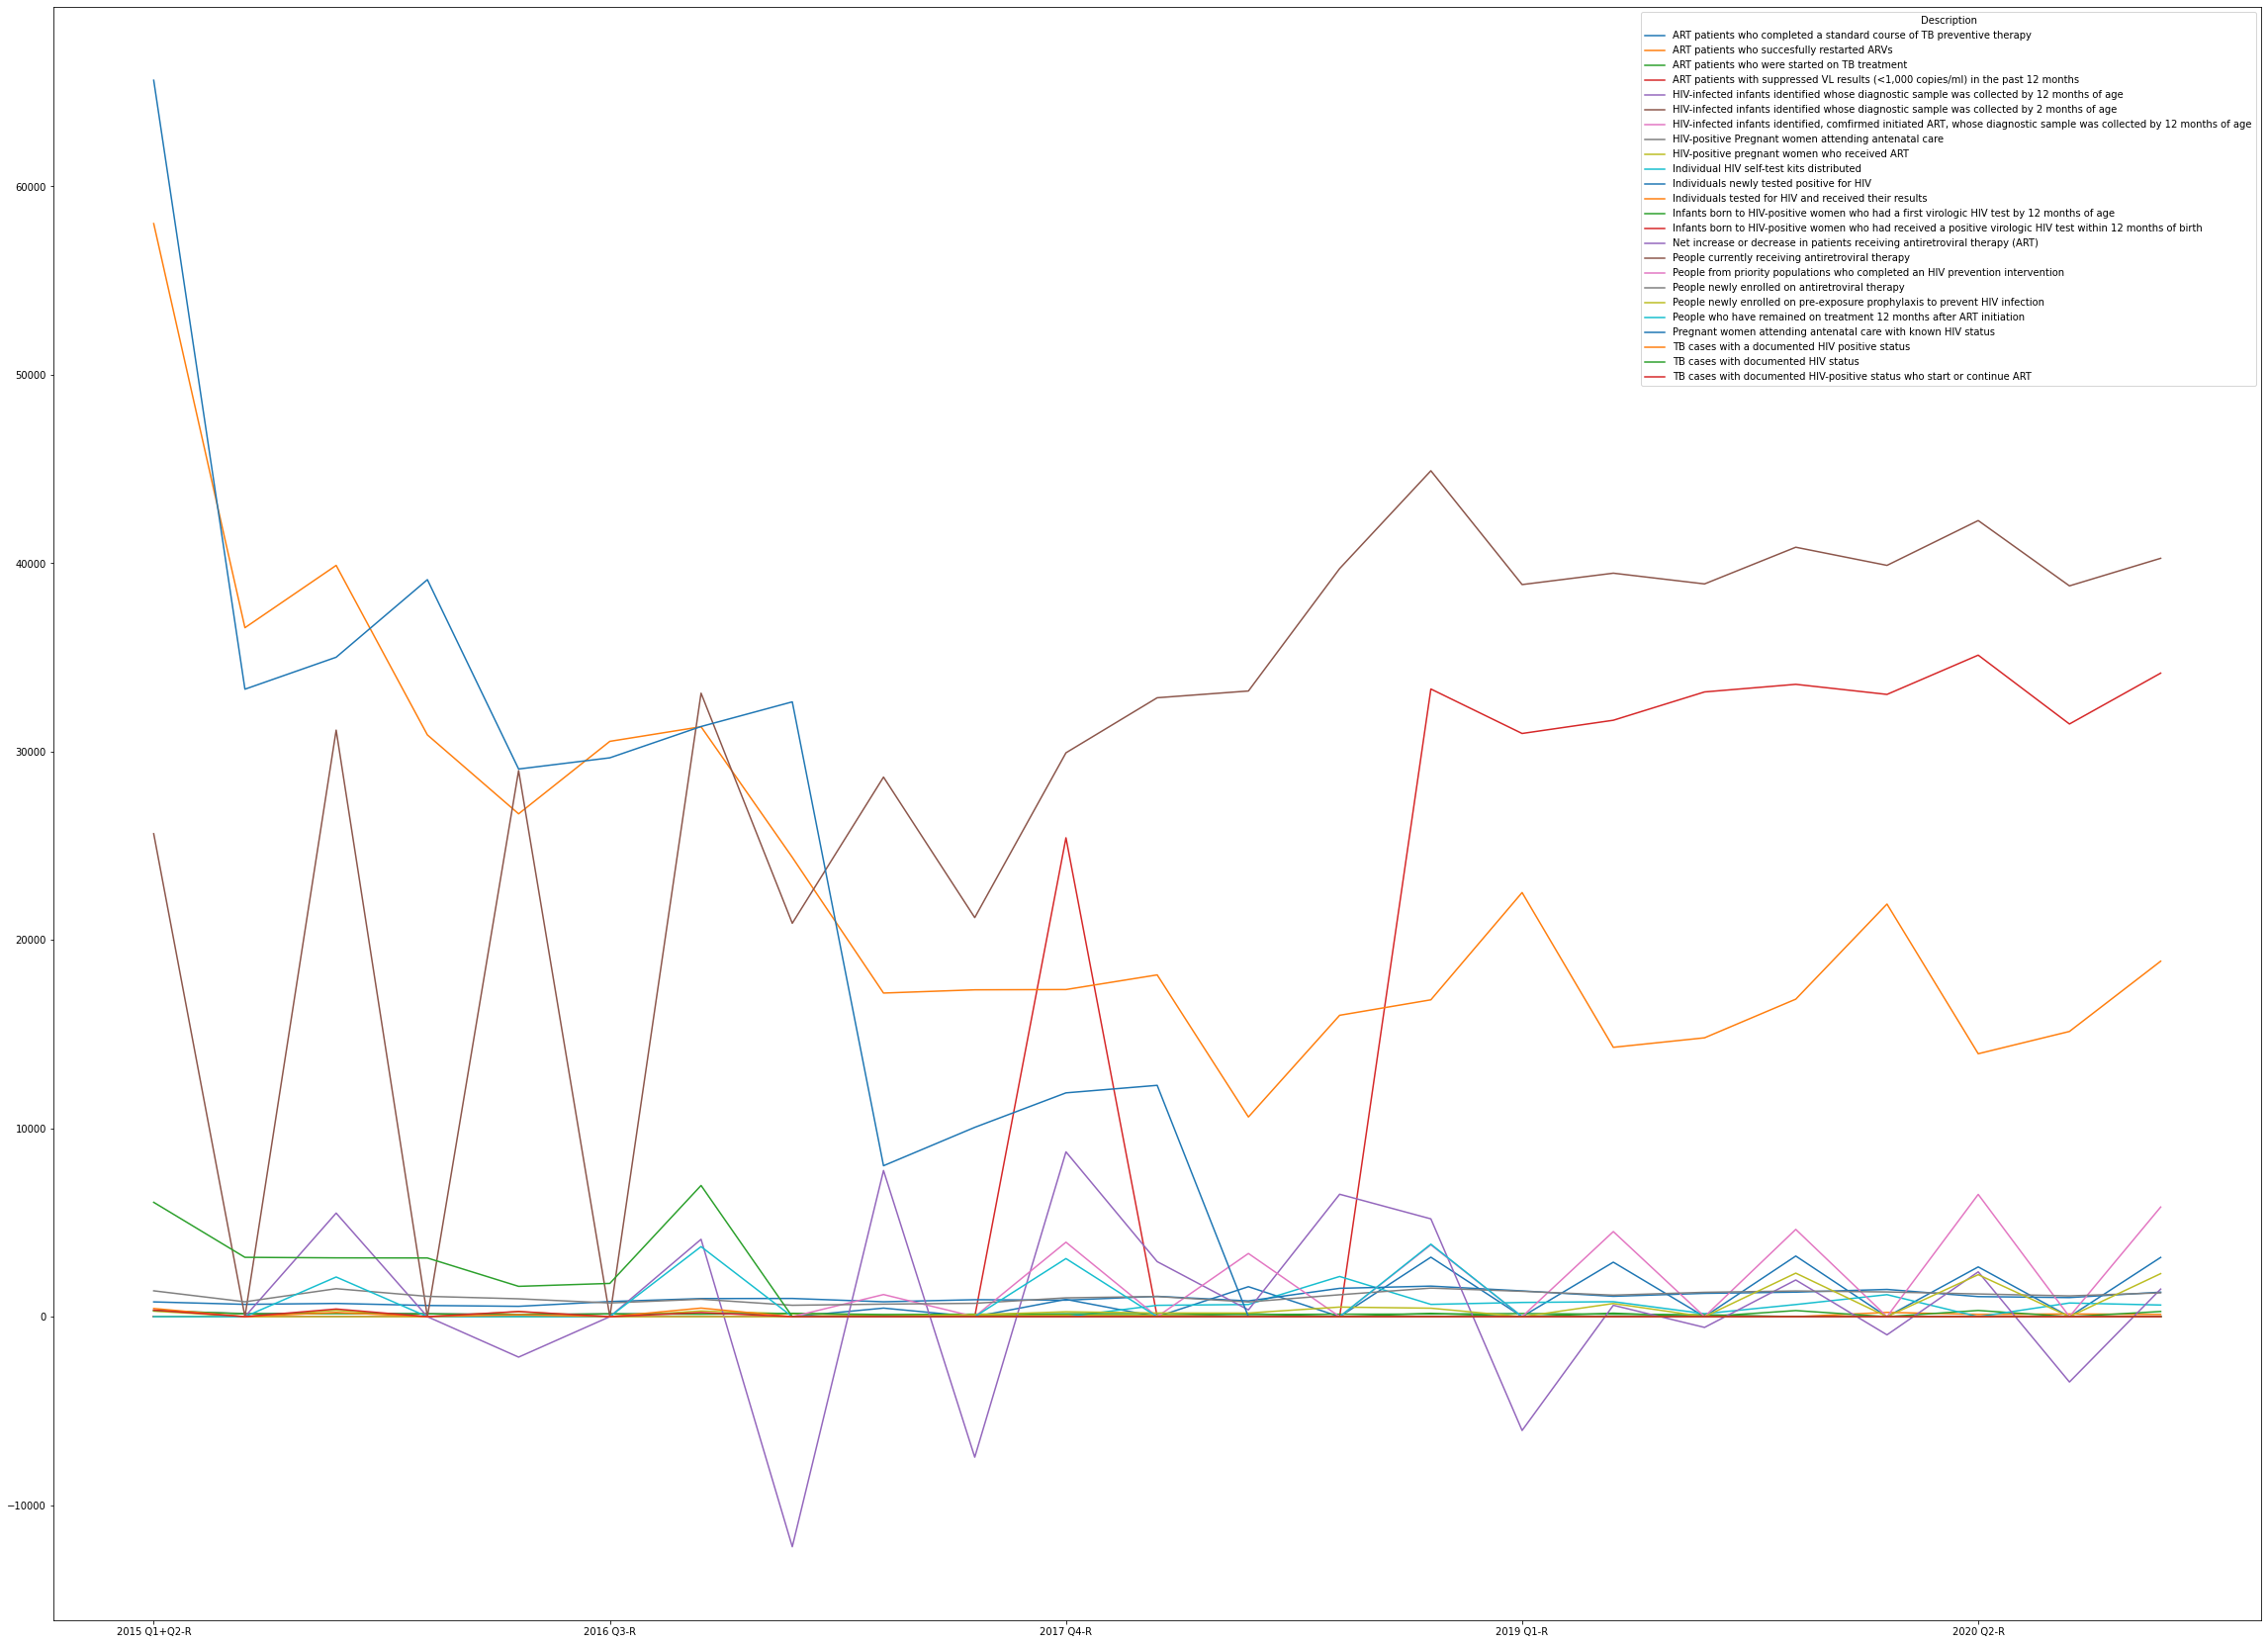

In [100]:
dfhcmc_insight.plot(figsize = (40, 30))

From Q4 2018 until Q4 2020 ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months and People currently receiving antiretroviral therapy has the same pattern 

<function matplotlib.pyplot.show(close=None, block=None)>

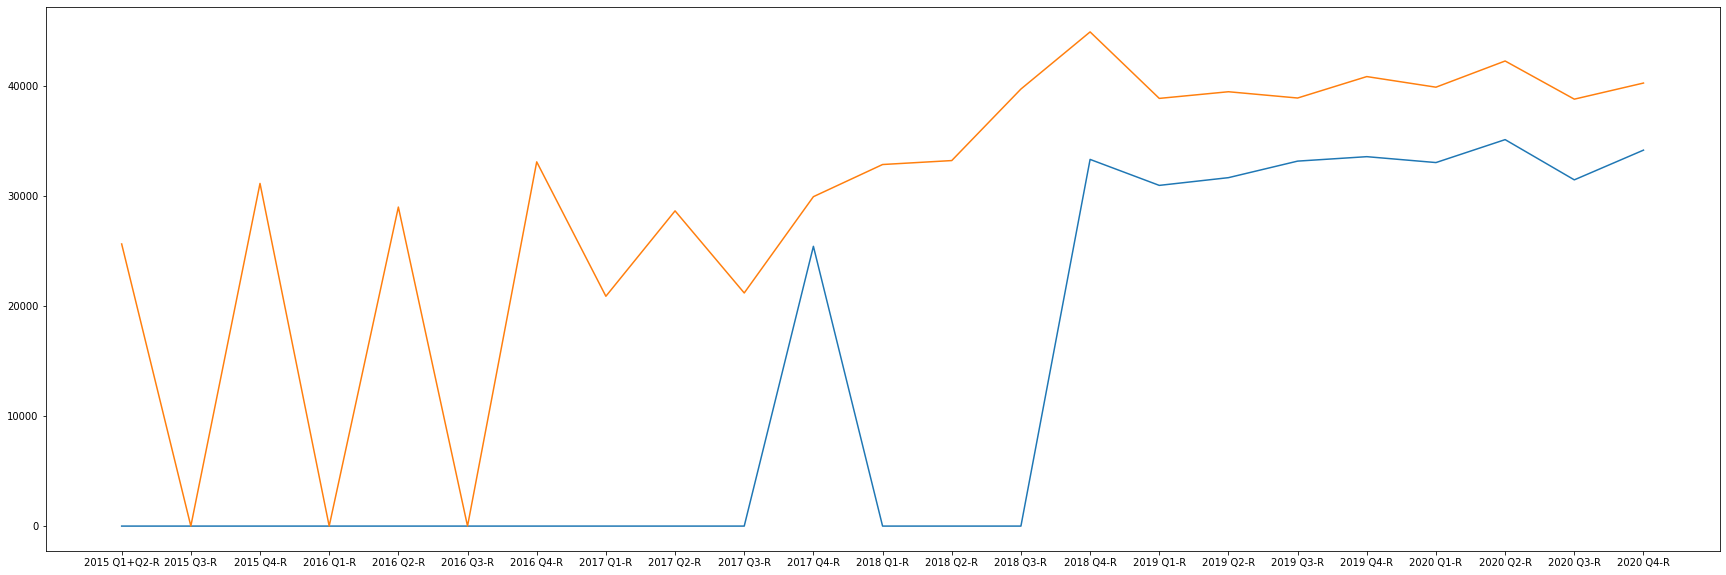

In [102]:
plt.ion()
plt.figure(figsize = (30, 10))
plt.plot(dfhcmc_insight.index, dfhcmc_insight['ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months'])
plt.plot(dfhcmc_insight.index, dfhcmc_insight['People currently receiving antiretroviral therapy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

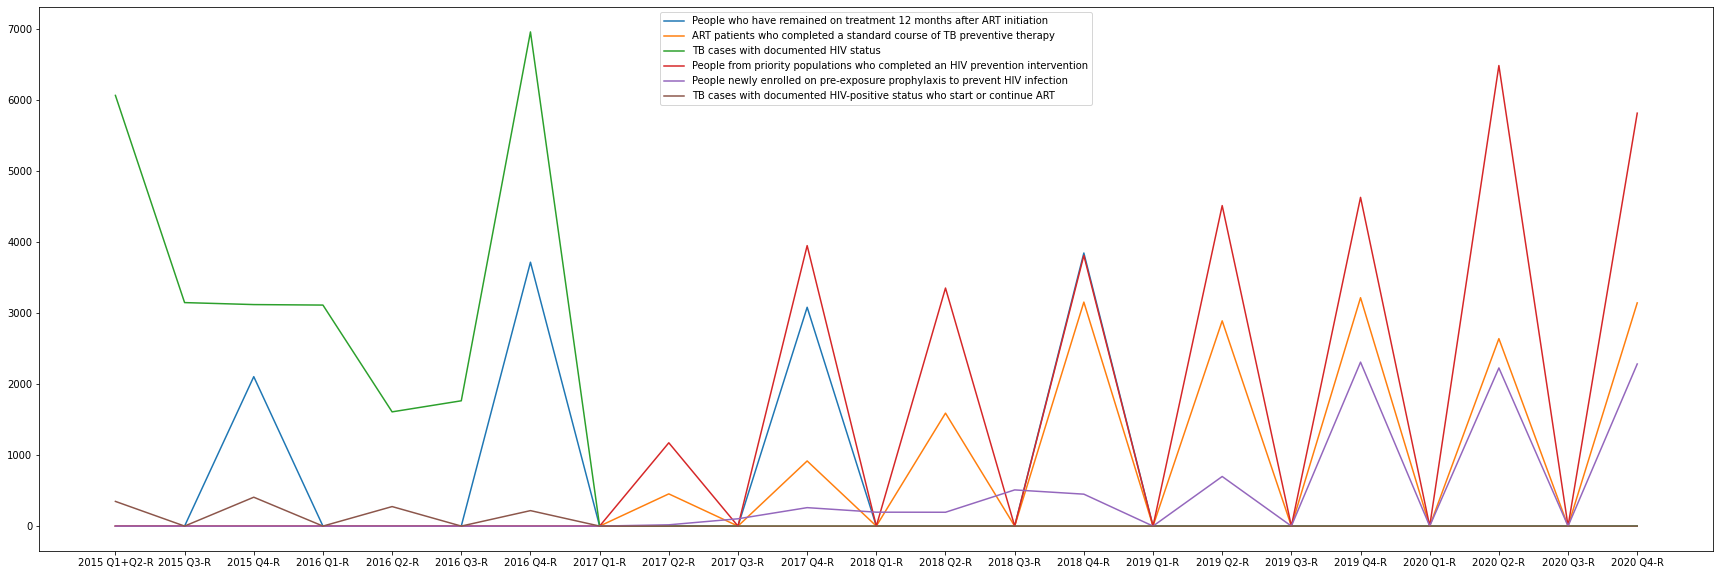

In [104]:
plt.ion()
plt.figure(figsize = (30, 10))
plt.plot(dfhcmc_insight.index, dfhcmc_insight['People who have remained on treatment 12 months after ART initiation'], label = 'People who have remained on treatment 12 months after ART initiation')
plt.plot(dfhcmc_insight.index, dfhcmc_insight['ART patients who completed a standard course of TB preventive therapy'], label = 'ART patients who completed a standard course of TB preventive therapy')
plt.plot(dfhcmc_insight.index, dfhcmc_insight['TB cases with documented HIV status'], label = 'TB cases with documented HIV status')
plt.plot(dfhcmc_insight.index, dfhcmc_insight['People from priority populations who completed an HIV prevention intervention'], label = 'People from priority populations who completed an HIV prevention intervention')
plt.plot(dfhcmc_insight.index, dfhcmc_insight['People newly enrolled on pre-exposure prophylaxis to prevent HIV infection'], label = 'People newly enrolled on pre-exposure prophylaxis to prevent HIV infection')
plt.plot(dfhcmc_insight.index, dfhcmc_insight['TB cases with documented HIV-positive status who start or continue ART'], label = 'TB cases with documented HIV-positive status who start or continue ART')          
plt.legend()
plt.show

In [105]:
plotdf = dfhcmc_insight.loc["2017 Q4-R":"2020 Q4-R", ["People currently receiving antiretroviral therapy", "ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months"]]
plotdf

Description  People currently receiving antiretroviral therapy  \
2017 Q4-R                                              29933.0   
2018 Q1-R                                              32855.0   
2018 Q2-R                                              33214.0   
2018 Q3-R                                              39713.0   
2018 Q4-R                                              44905.0   
2019 Q1-R                                              38863.0   
2019 Q2-R                                              39468.0   
2019 Q3-R                                              38898.0   
2019 Q4-R                                              40846.0   
2020 Q1-R                                              39882.0   
2020 Q2-R                                              42262.0   
2020 Q3-R                                              38794.0   
2020 Q4-R                                              40258.0   

Description  ART patients with suppressed VL results (<1,000 copies/ml) in the past 12 months  
2017 Q4-R                                              25421.0                                 
2018 Q1-R                                                  0.0                                 
2018 Q2-R                                                  0.0                                 
2018 Q3-R                                                  0.0                                 
2018 Q4-R                                              33319.0                                 
2019 Q1-R                                              30959.0                                 
2019 Q2-R                                              31661.0                                 
2019 Q3-R                                              33164.0                                 
2019 Q4-R                                              33568.0                                 
2020 Q1-R                                              33033.0                                 
2020 Q2-R                                              35117.0                                 
2020 Q3-R                                              31462.0                                 
2020 Q4-R                                              34162.0

<AxesSubplot:>

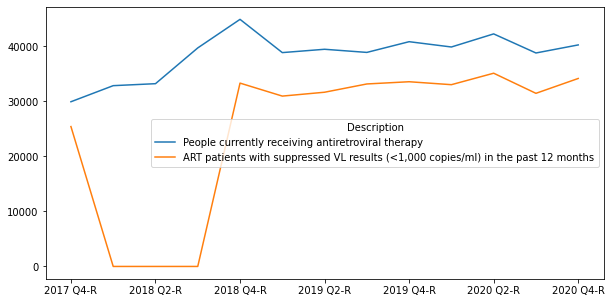

In [106]:
plotdf.plot(figsize = (10, 5))

<AxesSubplot:>

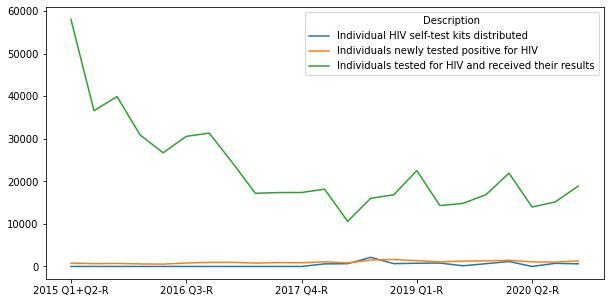

In [107]:
plotdf = dfhcmc_insight.loc[:, ["Individual HIV self-test kits distributed", "Individuals newly tested positive for HIV", "Individuals tested for HIV and received their results"]]
plotdf
plotdf.plot(figsize = (10, 5))

<AxesSubplot:>

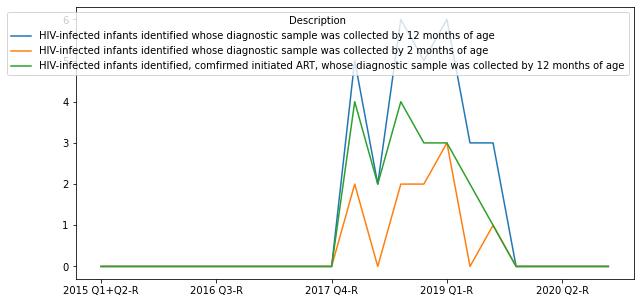

In [114]:
plotdf = dfhcmc_insight.loc[:, ["HIV-infected infants identified whose diagnostic sample was collected by 12 months of age", "HIV-infected infants identified whose diagnostic sample was collected by 2 months of age", "HIV-infected infants identified, comfirmed initiated ART, whose diagnostic sample was collected by 12 months of age"]]
plotdf
plotdf.plot(figsize = (10, 5))

<AxesSubplot:>

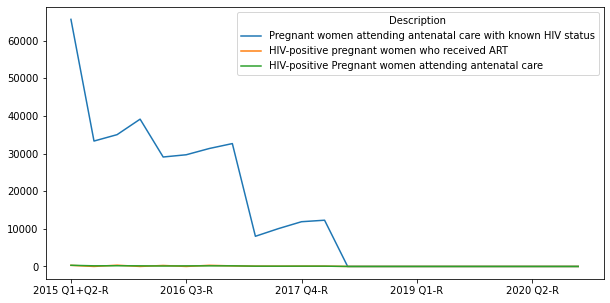

In [111]:
plotdf = dfhcmc_insight.loc[:, ["Pregnant women attending antenatal care with known HIV status", "HIV-positive pregnant women who received ART", "HIV-positive Pregnant women attending antenatal care"]]
plotdf.plot(figsize = (10, 5))

<AxesSubplot:>

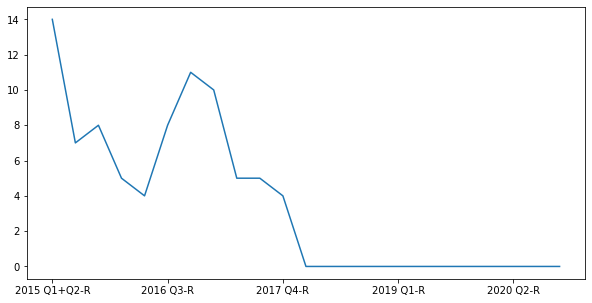

In [110]:
plotdf = dfhcmc_insight.loc[:, "Infants born to HIV-positive women who had received a positive virologic HIV test within 12 months of birth"]
plotdf
plotdf.plot(figsize = (10, 5))